## Multiple Linear Regression 

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands 

## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Importing - important library 

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score




### Reading the Data file 

In [2]:
bike=pd.read_csv("day.csv")

### Peeping into data and see various informations 

In [3]:
bike.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### by using describe function , we can conclude that Numerical data is good , no big outliers are present .


In [7]:
### Checking for missing values/columns

bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### No missing values are present in any column

In [8]:
bike.select_dtypes('int64').columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
bike.select_dtypes('float64').columns

Index(['temp', 'atemp', 'hum', 'windspeed'], dtype='object')

In [10]:
bike.select_dtypes('object').columns

Index(['dteday'], dtype='object')

In [11]:
bike.dteday


0      01-01-2018
1      02-01-2018
2      03-01-2018
3      04-01-2018
4      05-01-2018
          ...    
725    27-12-2019
726    28-12-2019
727    29-12-2019
728    30-12-2019
729    31-12-2019
Name: dteday, Length: 730, dtype: object

### Visualizing the Data 

- Scatter Plot for all Numerical Data -to see the relations 

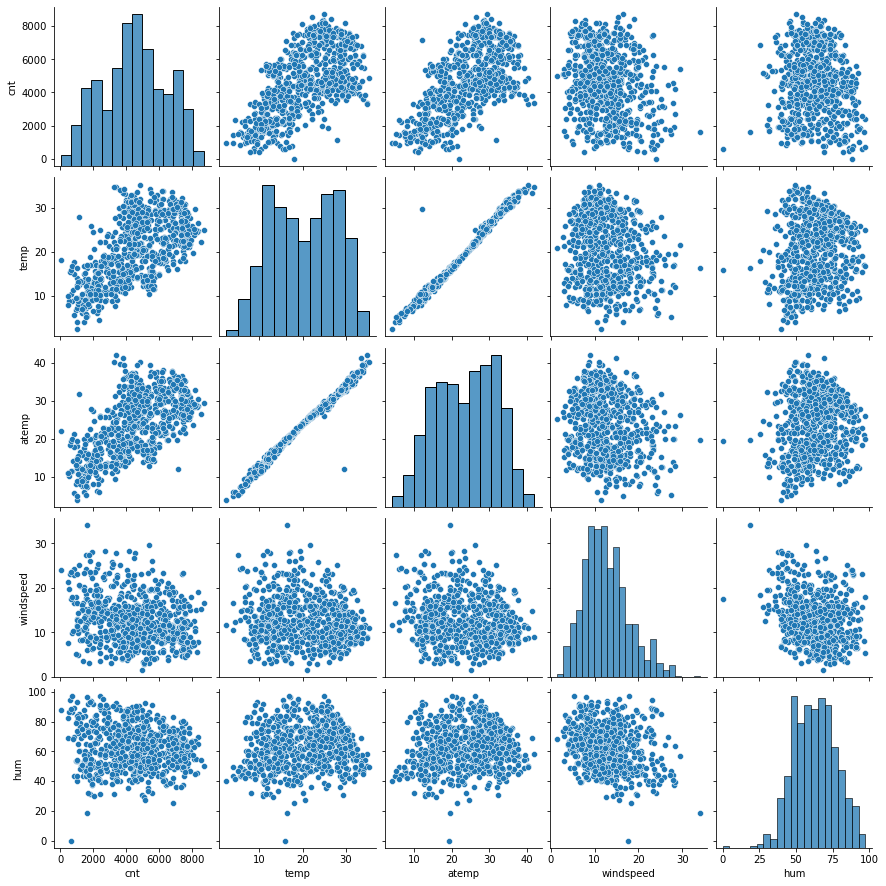

In [12]:
sns.pairplot(data=bike , vars=['cnt', 'temp', 'atemp', 'windspeed', 'hum'] )
plt.show()

### Inferences 
- Count is increasing with temperature increase , +ve linear relationship 
- Count/Bike rental are observed at high feel-like temperature , +ve relationship .
- Temperature and humidity is releated , Count is present even in high humidity .


### Categorical Variables -Visualization 



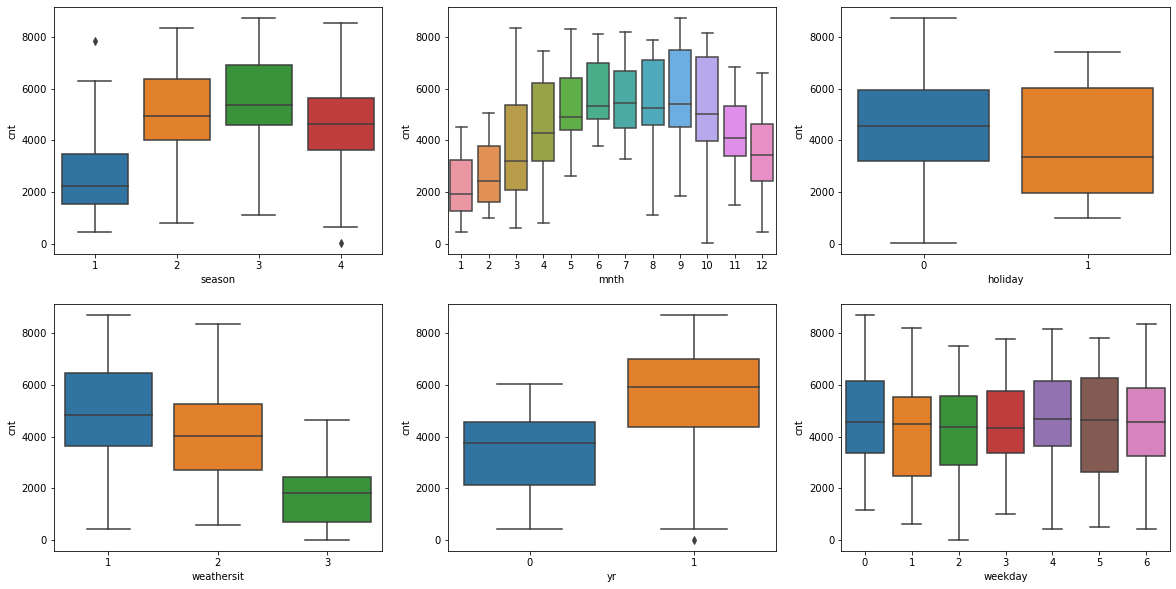

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=bike)
plt.subplot(2,3,2)
sns.boxplot(x='mnth', y='cnt', data=bike)
plt.subplot(2,3,3)
sns.boxplot(x='holiday', y='cnt', data=bike)
plt.subplot(2,3,4)
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.subplot(2,3,5)
sns.boxplot(x='yr', y='cnt', data=bike)
plt.subplot(2,3,6)
sns.boxplot(x='weekday', y='cnt', data=bike)
plt.show()

### Categorical Variables -Visualization -Bar Plot 


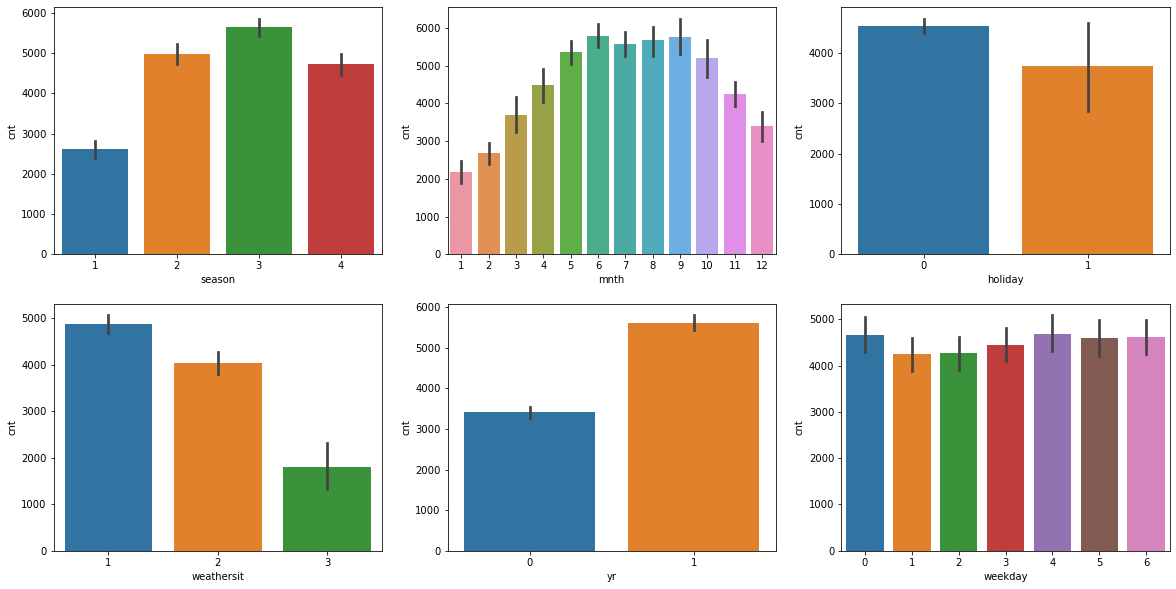

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.barplot(x='season', y='cnt', data=bike)
plt.subplot(2,3,2)
sns.barplot(x='mnth', y='cnt', data=bike)
plt.subplot(2,3,3)
sns.barplot(x='holiday', y='cnt', data=bike)
plt.subplot(2,3,4)
sns.barplot(x='weathersit', y='cnt', data=bike)
plt.subplot(2,3,5)
sns.barplot(x='yr', y='cnt', data=bike)
plt.subplot(2,3,6)
sns.barplot(x='weekday', y='cnt', data=bike)
plt.show()

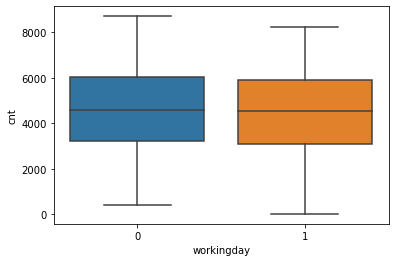

In [15]:
sns.boxplot(x='workingday', y='cnt', data=bike)
plt.show()

#### Inferences 

- Bike Share was increased 2019 
- Count values increased in summer Months 
- Count values less during Holidays 
- Bike Sharing was minimum in Spring 
- for weather situation -4- "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" -there is zero count .


### Data Preparations 

- Dropping column which seems irrevalant 

In [16]:
bike.drop(['registered', 'casual', 'dteday', 'instant'], axis=1, inplace=True)

In [17]:
bike.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349


### Converting Numical variable to categorical data 

In [18]:
bike.season=bike.season.map({1:'Spring', 2: 'Summer', 3:'Fall', 4:'Winter'})


In [19]:
bike.weathersit=bike.weathersit.map({1:'Clear', 2 :'Mist & Cloudy', 3 :'Light Snow & Rain', 4:'Heavy Snow & Rain'})

In [20]:
import calendar 

bike['mnth']=bike['mnth'].apply(lambda x : calendar.month_abbr[x])

In [21]:
bike.weekday=bike.weekday.map({0:"Sunday", 1:"Monday", 2:"Tuesday", 3: "Wednesday", 4: "Thrusday", 5:"Friday", 6:"Saturday"})


In [22]:
bike.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349


### Dummy Variables 
- Creating Dummy Varaible on season, mnth, weathersit, weekday 

In [23]:
dummy_col =bike[['season', 'weathersit', 'weekday', 'mnth']]

In [24]:
dummy=pd.get_dummies(dummy_col, drop_first=True)

In [25]:
bike=pd.concat([dummy,bike], axis=1)

In [26]:
bike.head(3)

,season_Spring,season_Summer,season_Winter,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,1,1,0,0,0,0,...,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,1,0,0,0,0,1,...,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,0,0,0,0,...,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349


In [27]:
bike.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)

In [28]:
bike.head(3)

,season_Spring,season_Summer,season_Winter,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,...,mnth_Oct,mnth_Sep,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349


In [29]:
bike.shape

(730, 30)

### Splitting Data into Training and Test Sets 

In [30]:
train, test = train_test_split(bike,train_size=0.7, test_size=0.3, random_state=100)

### Rescaling the Features 

In [31]:
scaler=MinMaxScaler()

### Apply scaler to all the columns except the dummy variables 

In [32]:
num_vars=['cnt', 'hum', 'windspeed', 'temp', 'atemp']

In [33]:
train[num_vars]=scaler.fit_transform(train[num_vars])

In [34]:
train.head(3)

,season_Spring,season_Summer,season_Winter,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,...,mnth_Oct,mnth_Sep,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255


###  check for correraltion between Numerical variables Only

<AxesSubplot:>

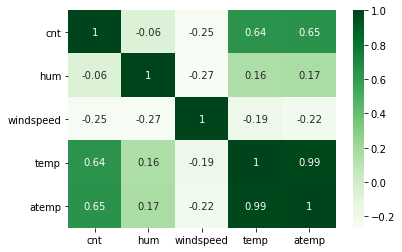

In [35]:
sns.heatmap(train[num_vars].corr(), annot=True, cmap='Greens')

### Dividing into X_train and y_train sets for the Model Building 

- cnt is target variable 

In [36]:
y_train=train.pop('cnt')
X_train=train

### Building a Linear Model 

In [37]:
lm=LinearRegression()

In [38]:
lm.fit(X_train,y_train)

LinearRegression()

In [39]:
rfe=RFE(lm,15)

In [40]:
rfe=rfe.fit(X_train,y_train)

In [41]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thrusday', False, 13),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 11),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1)]

### Chossing All the columns selected by RFE -Recursive Feature Eliminations Method

In [42]:
cols=X_train.columns[rfe.support_]

In [43]:
# Contains all the columns  selected by RFE 
cols 

Index(['season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'mnth_Dec',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'yr', 'holiday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

### Total colums in X_train

In [44]:
X_train.columns

Index(['season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'yr', 'holiday',
       'workingday', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

### Select the columns that are neeeded 

In [45]:
X_train.columns[~rfe.support_]

Index(['weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday', 'mnth_Aug',
       'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'workingday', 'atemp'],
      dtype='object')

### Creating a new dataframe X_train_rfe with selected column via rfe methods 

In [46]:
X_train_rfe=X_train[cols]

In [47]:
X_train_rfe=sm.add_constant(X_train_rfe)

### Creating a model 

In [48]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [49]:
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 02 May 2021   Prob (F-statistic):          3.34e-189
Time:                        00:02:30   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3202      0.036      8.886      0.000       0.249       0.391
season_Spring                   -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_Summer                    0.0408      0.015      2.659      0.008       0.011       0.071
season_Winter                    0.1034      0.018      5.763      0.000       0.068       0.139
weathersit_Light Snow & Rain    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weathersit_Mist & Cloudy        -0.0559      0.010     -5.338      0.000      -0.076      -0.035
mnth_Dec                        -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_Jan                        -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_Jul                        -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_Nov                        -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_Sep                         0.0749      0.017      4.438      0.000       0.042       0.108
yr                               0.2303      0.008     28.511      0.000       0.214       0.246
holiday                         -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                             0.4800      0.037     12.977      0.000       0.407       0.553
hum                             -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                       -0.1885      0.026     -7.312      0.000      -0.239      -0.138
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
lm.params

const                           0.320243
season_Spring                  -0.061737
season_Summer                   0.040767
season_Winter                   0.103435
weathersit_Light Snow & Rain   -0.248116
weathersit_Mist & Cloudy       -0.055876
mnth_Dec                       -0.037199
mnth_Jan                       -0.043748
mnth_Jul                       -0.055495
mnth_Nov                       -0.040949
mnth_Sep                        0.074891
yr                              0.230328
holiday                        -0.091228
temp                            0.479977
hum                            -0.160227
windspeed                      -0.188457
dtype: float64

#### Model has pretty good R-square and adjusted R-square greater than .80  also no p-value is greater that .05 .

### Checking VIF for Multicoliearity 

In [51]:
vif=pd.DataFrame()
X=X_train_rfe
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,features,VIF
0,const,82.48
1,season_Spring,5.27
13,temp,4.42
3,season_Winter,3.83
2,season_Summer,2.76
14,hum,1.93
9,mnth_Nov,1.76
7,mnth_Jan,1.68
5,weathersit_Mist & Cloudy,1.57
6,mnth_Dec,1.49


#### In General , VIF should be less than 5 . So we can drop the column which has VIF more than 5.

In [52]:
X_train_new=X_train_rfe.drop(['const'], axis=1)

In [53]:
vif=pd.DataFrame()
X=X_train_new
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,features,VIF
13,hum,30.94
12,temp,17.80
14,windspeed,4.72
0,season_Spring,4.37
2,season_Winter,4.06
1,season_Summer,2.81
4,weathersit_Mist & Cloudy,2.32
10,yr,2.09
8,mnth_Nov,1.83
6,mnth_Jan,1.75


### Model -2 

In [54]:
X_train_new=X_train_new.drop(['hum'], axis=1)

In [55]:
# Adding a constant value 
X_train_lm=sm.add_constant(X_train_new)

# create a model to fit 

lm=sm.OLS(y_train, X_train_lm).fit()

In [56]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sun, 02 May 2021   Prob (F-statistic):          1.57e-186
Time:                        00:02:31   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2466      0.032      7.679      0.000       0.184       0.310
season_Spring                   -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_Summer                    0.0333      0.015      2.148      0.032       0.003       0.064
season_Winter                    0.0887      0.018      4.951      0.000       0.053       0.124
weathersit_Light Snow & Rain    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
weathersit_Mist & Cloudy        -0.0814      0.009     -9.359      0.000      -0.099      -0.064
mnth_Dec                        -0.0445      0.018     -2.520      0.012      -0.079      -0.010
mnth_Jan                        -0.0503      0.018     -2.738      0.006      -0.086      -0.014
mnth_Jul                        -0.0504      0.018     -2.725      0.007      -0.087      -0.014
mnth_Nov                        -0.0419      0.019     -2.198      0.028      -0.079      -0.004
mnth_Sep                         0.0682      0.017      3.992      0.000       0.035       0.102
yr                               0.2343      0.008     28.709      0.000       0.218       0.250
holiday                         -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                             0.4377      0.036     12.083      0.000       0.366       0.509
windspeed                       -0.1586      0.025     -6.290      0.000      -0.208      -0.109
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculate the VIF again 

In [57]:
vif=pd.DataFrame()
X=X_train_new
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,features,VIF
12,temp,5.17
13,windspeed,4.67
2,season_Winter,2.94
0,season_Spring,2.89
1,season_Summer,2.23
10,yr,2.07
8,mnth_Nov,1.80
6,mnth_Jan,1.66
7,mnth_Jul,1.59
4,weathersit_Mist & Cloudy,1.56


### Residual Analsyis of training Data 

In [58]:
y_train_count=lm.predict(X_train_lm)

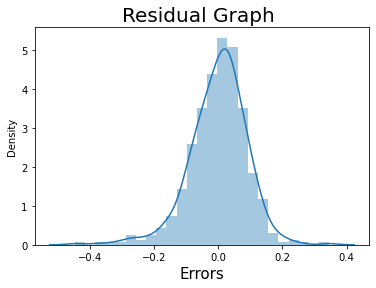

In [59]:
sns.distplot((y_train-y_train_count), bins=25)
plt.xlabel('Errors', fontsize=15)
plt.title("Residual Graph ", fontsize=20)
plt.show()

### Do preditions using the Model 
- Apply Scaling on test Sets 

In [60]:
num_cols=['cnt', 'hum', 'windspeed', 'temp', 'atemp']

In [61]:
test[num_cols]=scaler.transform(test[num_cols])

In [62]:
test.describe()

,season_Spring,season_Summer,season_Winter,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,...,mnth_Oct,mnth_Sep,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.027397,0.319635,0.118721,0.173516,0.155251,0.141553,0.123288,...,0.082192,0.086758,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.163612,0.467403,0.324202,0.379560,0.362974,0.349389,0.329520,...,0.275286,0.282125,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [63]:
## Spitting into X_test and y_test 

y_test=test.pop('cnt')
X_test=test

In [64]:
# Adding constant to Dataframe 
X_test=sm.add_constant(X_test)

In [65]:
test_cols=X_train_lm.columns
test_cols

Index(['const', 'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'mnth_Dec',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'yr', 'holiday', 'temp',
       'windspeed'],
      dtype='object')

In [66]:
X_test=X_test[test_cols[1:]]
X_test=sm.add_constant(X_test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Summer                 219 non-null    uint8  
 3   season_Winter                 219 non-null    uint8  
 4   weathersit_Light Snow & Rain  219 non-null    uint8  
 5   weathersit_Mist & Cloudy      219 non-null    uint8  
 6   mnth_Dec                      219 non-null    uint8  
 7   mnth_Jan                      219 non-null    uint8  
 8   mnth_Jul                      219 non-null    uint8  
 9   mnth_Nov                      219 non-null    uint8  
 10  mnth_Sep                      219 non-null    uint8  
 11  yr                            219 non-null    int64  
 12  holiday                       219 non-null    int64  
 13  temp

In [67]:
X_test.describe()

,const,season_Spring,season_Summer,season_Winter,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,yr,holiday,temp,windspeed
count,219.0,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,1.0,0.255708,0.264840,0.232877,0.027397,0.319635,0.086758,0.077626,0.105023,0.073059,0.086758,0.479452,0.036530,0.558941,0.313350
std,0.0,0.437258,0.442259,0.423633,0.163612,0.467403,0.282125,0.268194,0.307285,0.260830,0.282125,0.500722,0.188034,0.233698,0.159947
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,-0.042808
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.198517
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.558691,0.299459
75%,1.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.759096,0.403048
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.807474


In [68]:
y_pred=lm.predict(X_test)

### R2 Score of Final Model

In [69]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8132736736429255

### Last Step - Model Evalutions 

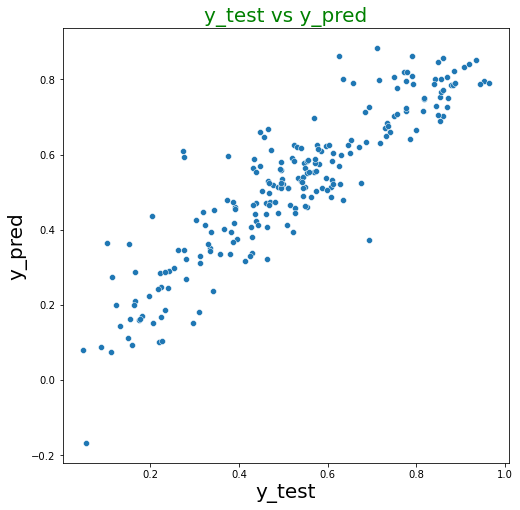

In [70]:
plt.figure(figsize=(8,8))
sns.scatterplot(y_test, y_pred)

plt.title("y_test vs y_pred", size=20, color='g')
plt.xlabel('y_test', fontsize=20)
plt.ylabel('y_pred', fontsize=20)
plt.show()

In [71]:
final=pd.DataFrame(lm.params)
final.insert(0,'Variables', final.index)
final.rename(columns={0:'Coeff Value'} ,inplace=True)
final['index']=list(range(0,15))
final.set_index('index', inplace=True)
final.sort_values(by='Coeff Value', ascending=False, inplace=True)
final

,Variables,Coeff Value
index,,
13,temp,0.437655
0,const,0.246635
11,yr,0.234287
3,season_Winter,0.088652
10,mnth_Sep,0.068219
2,season_Summer,0.033271
9,mnth_Nov,-0.041852
6,mnth_Dec,-0.044529
7,mnth_Jan,-0.050270


### We can see that the equations for best fitted line is 
cnt=.246635 + .4376*temp+ .23*yr+ .088*season_Winter + .06*mnth_Sep+.033*season_Summer -.041*mnth_Nov-.04*mnth_Dec-.05*mnth_jan+
-.05*mnth_jul-.07*season_Spring-.08*weathersit_Mist & Cloudy -.09*holiday-.158*windspeed -.29*weathersit_Light Snow & Rain

- All the postive coefficents like temp, season_summer indicate that if there will be increase then count will also increased .
- Negative Coeffiecnts means increase in these value will decrease in count .

#### Top 5 Significant Positive factor 

- temp
- yr
- season_Winter
- mnth_Sep
- season_Summer

#### Top 3 Negative Factor 

- weathersit_Light Snow & Rain
- windspeed
- holiday